In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/fetal_health.csv')

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


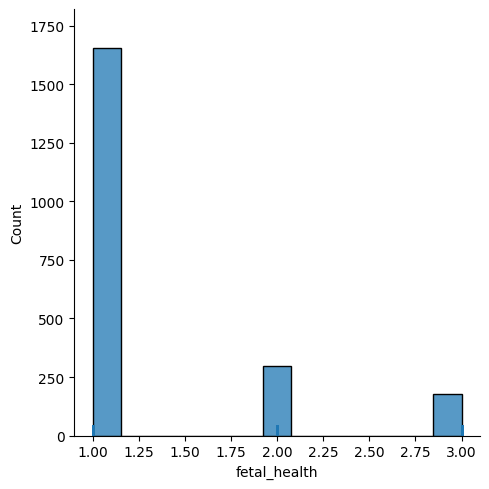

In [ ]:
sns.displot(df['fetal_health'], rug=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['fetal_health'], axis=1)
y = df['fetal_health']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Embedding, Dropout,Flatten
from keras import layers
from keras.utils import to_categorical

In [ ]:
y_train = y_train.astype(int)
y_train

1233    1
480     2
1111    1
1303    1
861     1
       ..
1638    1
1095    1
1130    1
1294    1
860     1
Name: fetal_health, Length: 1700, dtype: int64

In [ ]:
y_train_encoded = to_categorical(y_train-1)

In [ ]:
y_train_encoded.shape

(1700, 3)

In [ ]:
input_shape = (X_train.shape[1], 1)

In [ ]:
nn = [
    layers.Conv1D(32, 3, padding='same', activation='relu',input_shape=input_shape),
    layers.Dropout(0.2),
    layers.Conv1D(16, 1, activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
]

In [ ]:
model = Sequential(nn)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_encoded, validation_split=0.2, batch_size=32, epochs=6)

Epoch 1/6
43/43 [==============================] - 1s 7ms/step - loss: 0.9427 - accuracy: 0.6537 - val_loss: 0.6477 - val_accuracy: 0.8059
Epoch 2/6
43/43 [==============================] - 0s 3ms/step - loss: 0.7462 - accuracy: 0.7647 - val_loss: 0.5142 - val_accuracy: 0.8059
Epoch 3/6
43/43 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.7757 - val_loss: 0.4030 - val_accuracy: 0.8529
Epoch 4/6
43/43 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.7949 - val_loss: 0.3371 - val_accuracy: 0.8882
Epoch 5/6
43/43 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7941 - val_loss: 0.3059 - val_accuracy: 0.9000
Epoch 6/6
43/43 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.8074 - val_loss: 0.2978 - val_accuracy: 0.9000


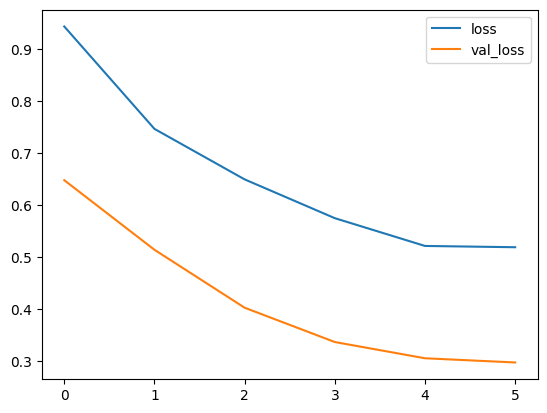

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import numpy as np

In [ ]:
preds_classes = np.argmax(preds, axis=1)

accuracy of the model:  0.01643192488262911


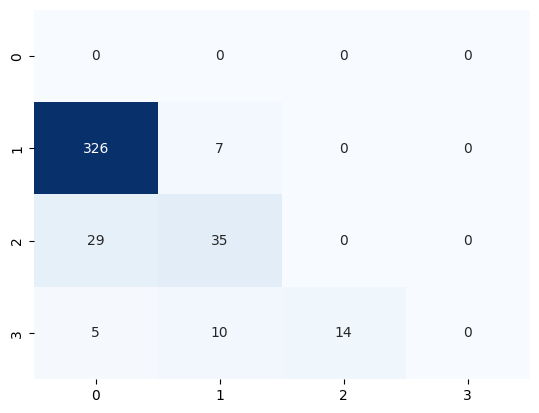

In [ ]:
cm = confusion_matrix(y_test , preds_classes)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

ac = accuracy_score(y_test,preds_classes)
print('accuracy of the model: ', ac)